In [88]:
! pip install pandas numpy seaborn matplotlib scikit-learn

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

telco_base_data = pd.read_csv('/Users/mac/MyPythonProjects/customer_churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(telco_base_data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [90]:
telco_base_data.shape

(7043, 21)

In [91]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [92]:
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [93]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [94]:
# check the distribution plot of the target variable churn
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize= (8,6))
plt.xlabel('Counts', labelpad=14)
plt.ylabel('Target Variable', labelpad=14)
plt.title('Count of Target Variable per category', y=1.02)

Text(0.5, 1.02, 'Count of Target Variable per category')

In [95]:
# Check the percentage distribution of the target variable churn
telco_base_data['Churn'].value_counts()*100/len(telco_base_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [96]:
# check the distribution of the target variable churn
telco_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [97]:
telco_base_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


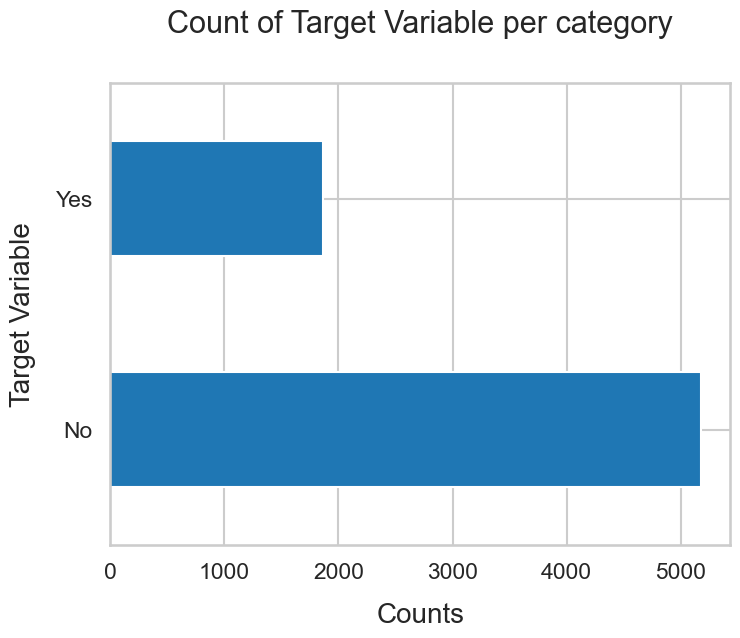

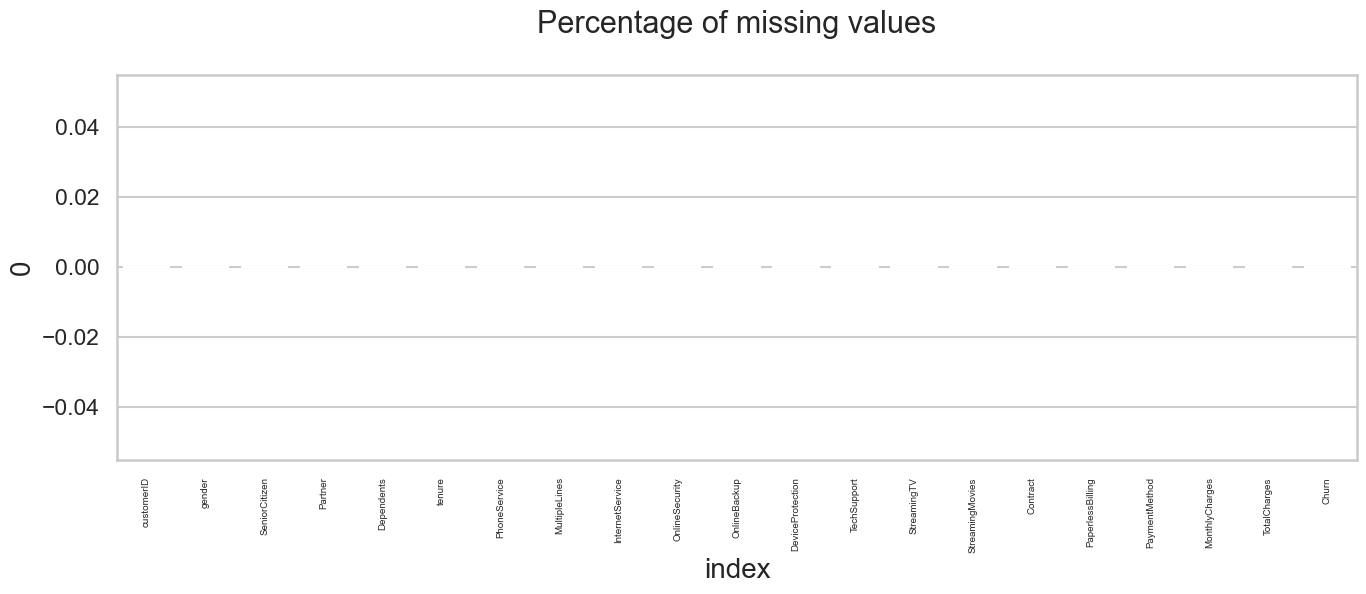

In [98]:
# create a DataFrame with the percentage of missing values 
missing = pd.DataFrame(telco_base_data.isnull().sum()*100/telco_base_data.shape[0]).reset_index()

# setup the plot
plt.figure(figsize=(16,5))
ax = sns.barplot(x='index', y=0, data= missing)

# customize the plot
plt.xticks(rotation=90, fontsize=7)
plt.title('Percentage of missing values')

# show the plot
plt.show()

In [99]:
telco_data = telco_base_data.copy()
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [100]:
# checking the rows containing missing values under TotalCharges column
telco_data.loc[telco_data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [101]:
# Removing missing values
telco_data.dropna(how='any', inplace=True)

In [102]:
# Get the max tenure value
telco_data['tenure'].max()

72

In [103]:
# Group the tenure in bins of 12 months
labels = ['{0} - {1}'.format(i, i+11) for i in range(1,72,12)]
telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [104]:
telco_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [105]:
# drop the tenure and customerID columns
telco_data.drop(columns=['tenure', 'customerID'], axis=1, inplace=True)

telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [106]:
# Univariate analysis
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

In [107]:
# converting the churn column to numerical values 
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [108]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [109]:
# create dummy variables for the categorical features
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [110]:
# visualize the relationship between MonthlyCharges and TotalCharges
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [111]:
# use kdeplot to compare the distribution of MonthlyCharges between churn and no churn customers
mnth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn'] == 0)], color='Red',fill=True)
mnth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn'] == 1)], ax = mnth, color='Blue',fill=True)
mnth.legend(['No Churn', 'Churn'], loc='upper right')
mnth.set_ylabel('Density')
mnth.set_xlabel('Monthly Charges')
mnth.set_title('Monthly Charges by Churn')

Text(0.5, 1.0, 'Monthly Charges by Churn')

In [112]:
# use kdeplot to compare the distribution of TotalCharges between churn and no churn customers
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies['Churn'] == 0)], color='Red', fill=True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies['Churn'] == 1)], ax= Tot, color='Blue', fill=True)
Tot.legend(['No Churn', 'Churn'], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total Charges by Churn')

Text(0.5, 1.0, 'Total Charges by Churn')

In [113]:
# visualize the correlation between the features and the target variable 'Churn'
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

In [114]:
plt.figure(figsize=(16,12))
sns.heatmap(data=telco_data_dummies.corr(), cmap='Paired')


<Axes: >

In [115]:
# We're splitting our dataset into two separate datasets based on the target variable 'churn' for Bivariate analysis by comparing different variables between churn and no churn customers group 
new_df1_target0=telco_data.loc[telco_data['Churn']==0] 
new_df1_target1=telco_data.loc[telco_data['Churn']==1] 

In [116]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

In [117]:
print(new_df1_target1['Partner'].value_counts())
print(new_df1_target1['gender'].value_counts())


Partner
No     1200
Yes     669
Name: count, dtype: int64
gender
Female    939
Male      930
Name: count, dtype: int64


/var/folders/r0/grxmw8tj1xd63m8v8rc0ghkm0000gn/T/ipykernel_19327/1580337236.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


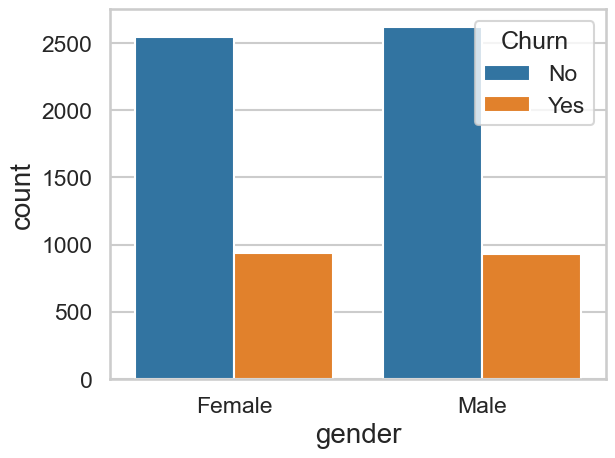

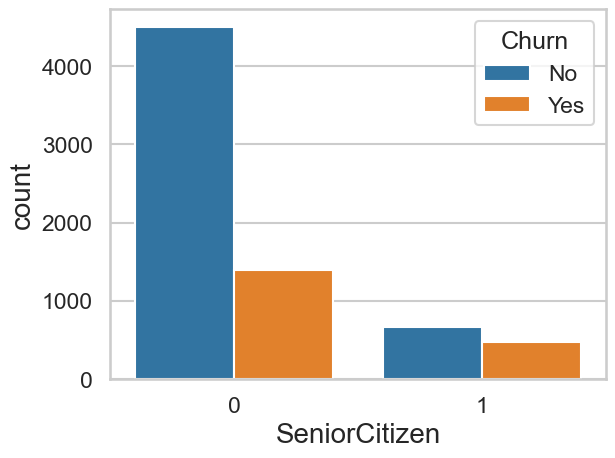

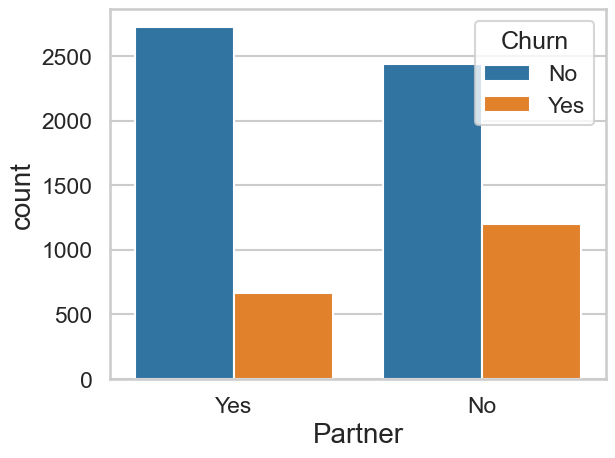

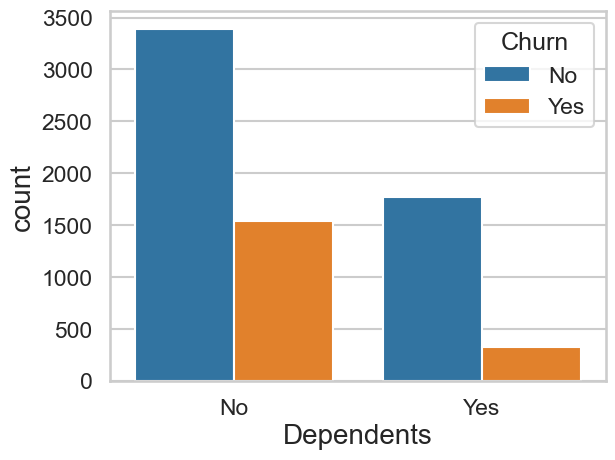

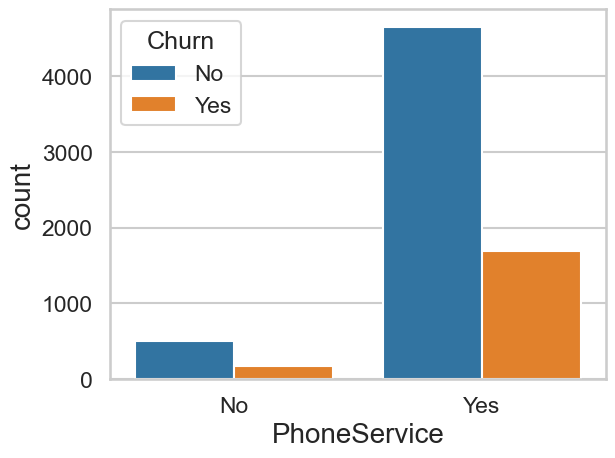

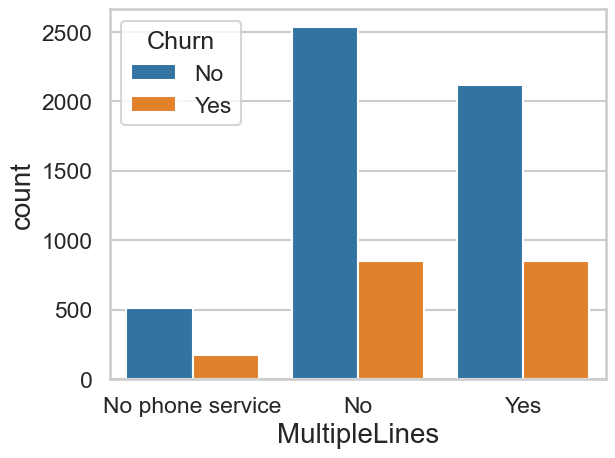

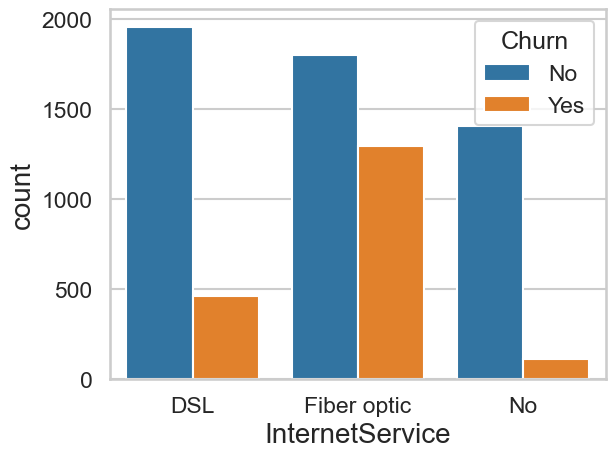

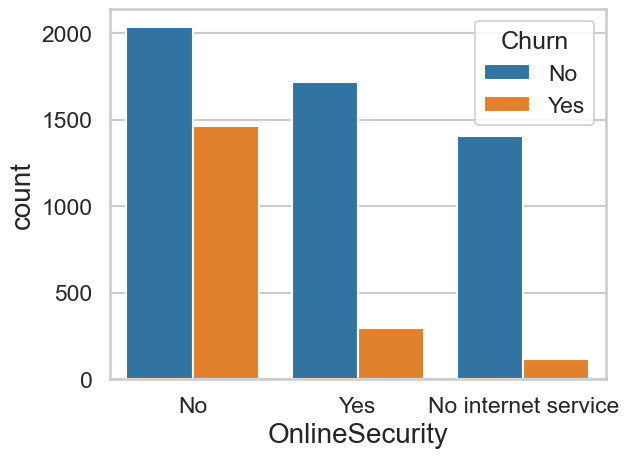

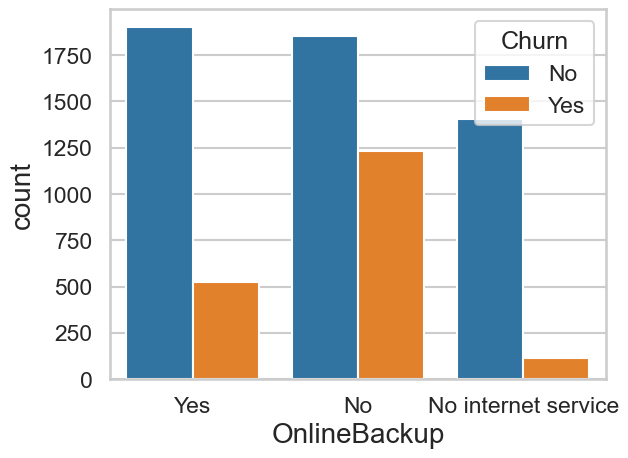

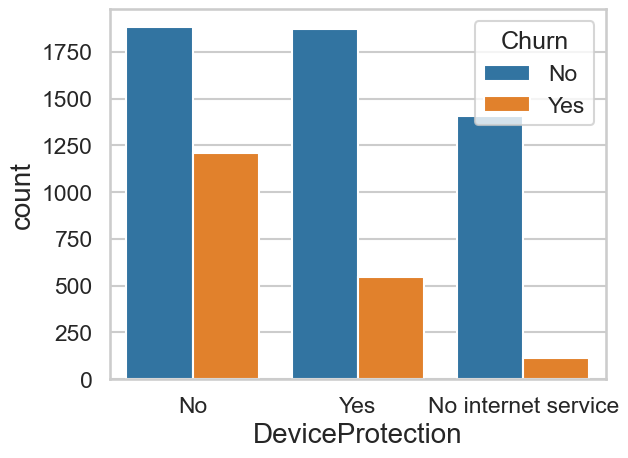

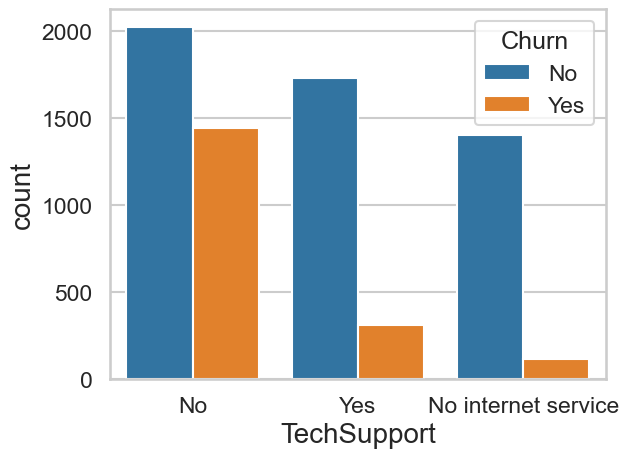

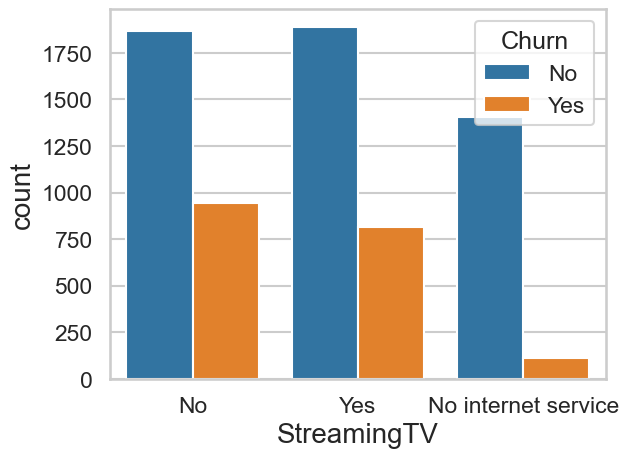

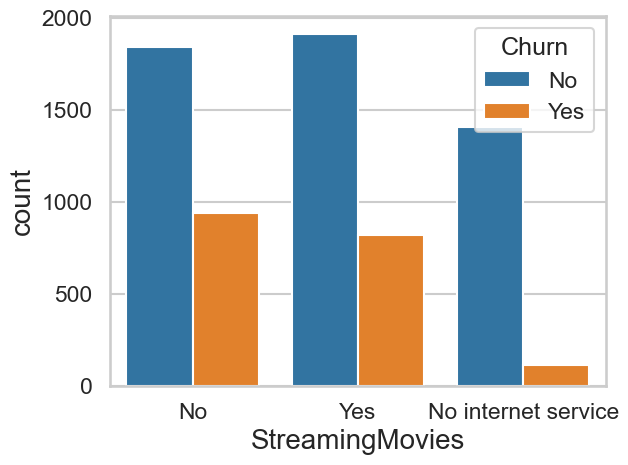

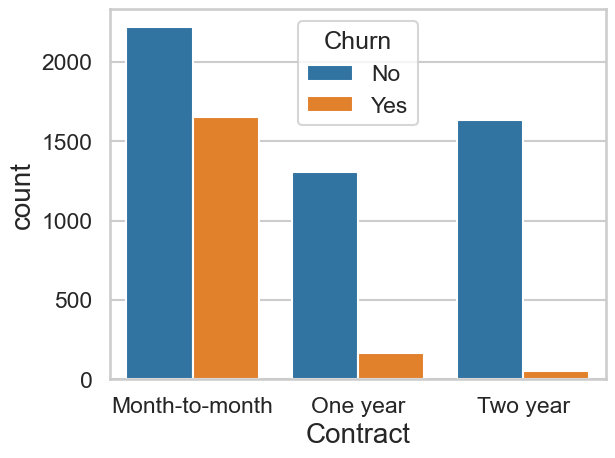

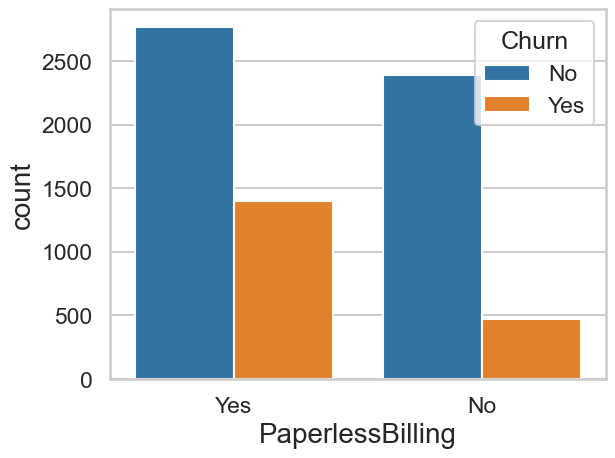

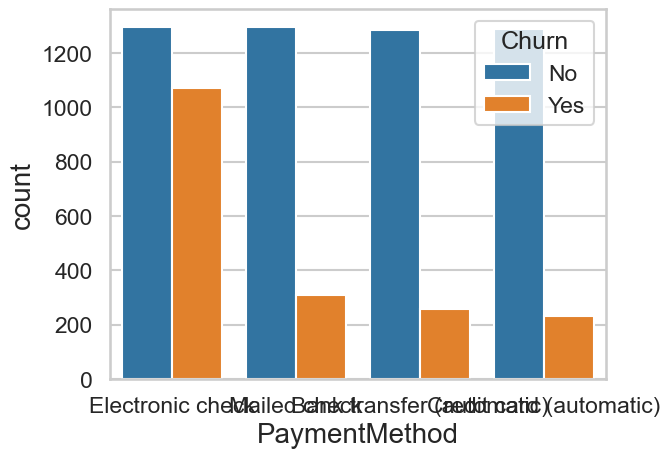

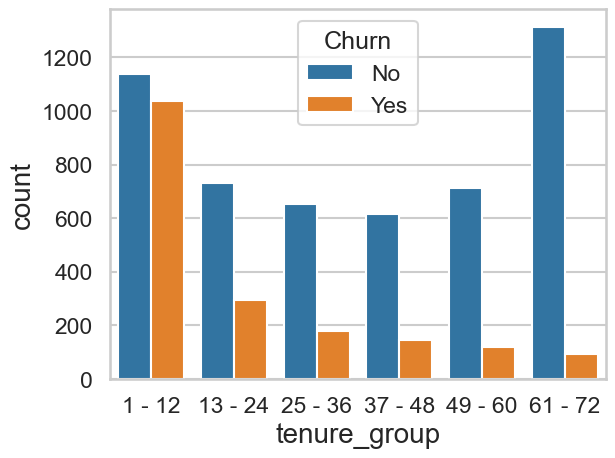

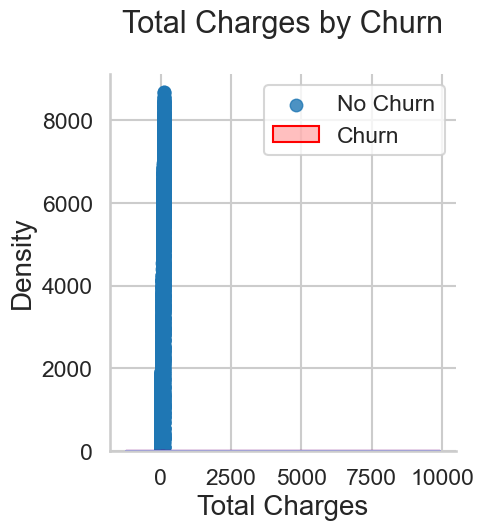

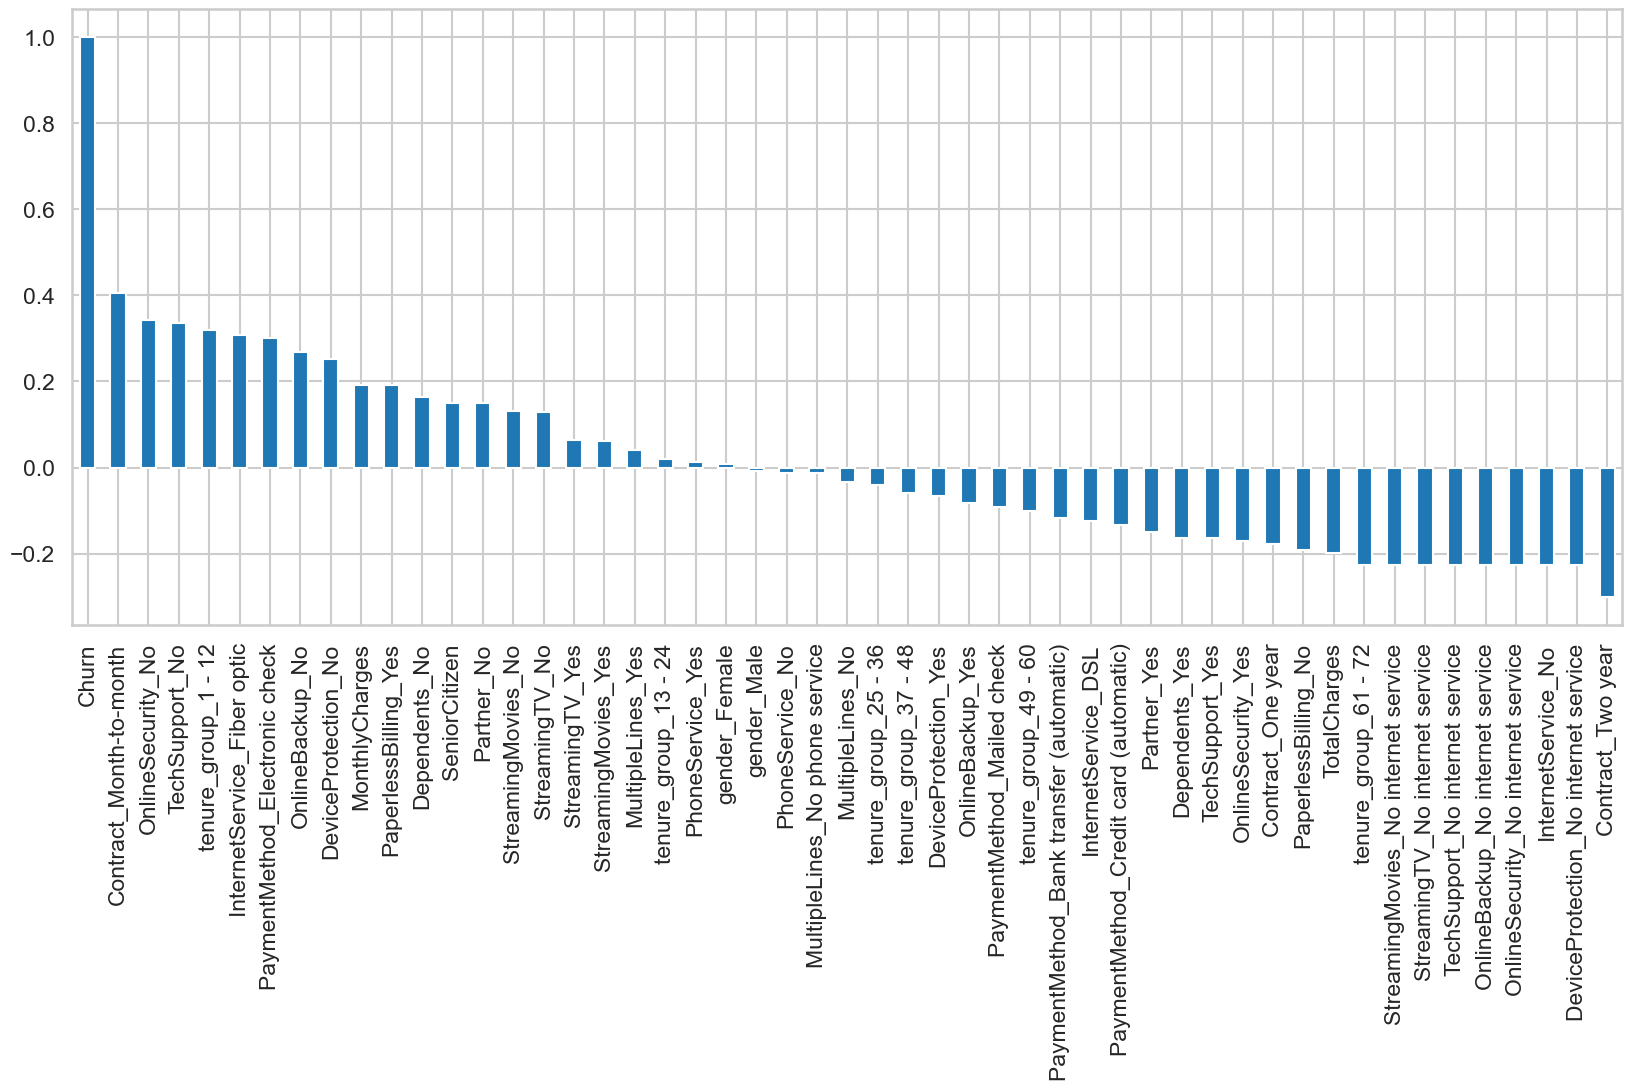

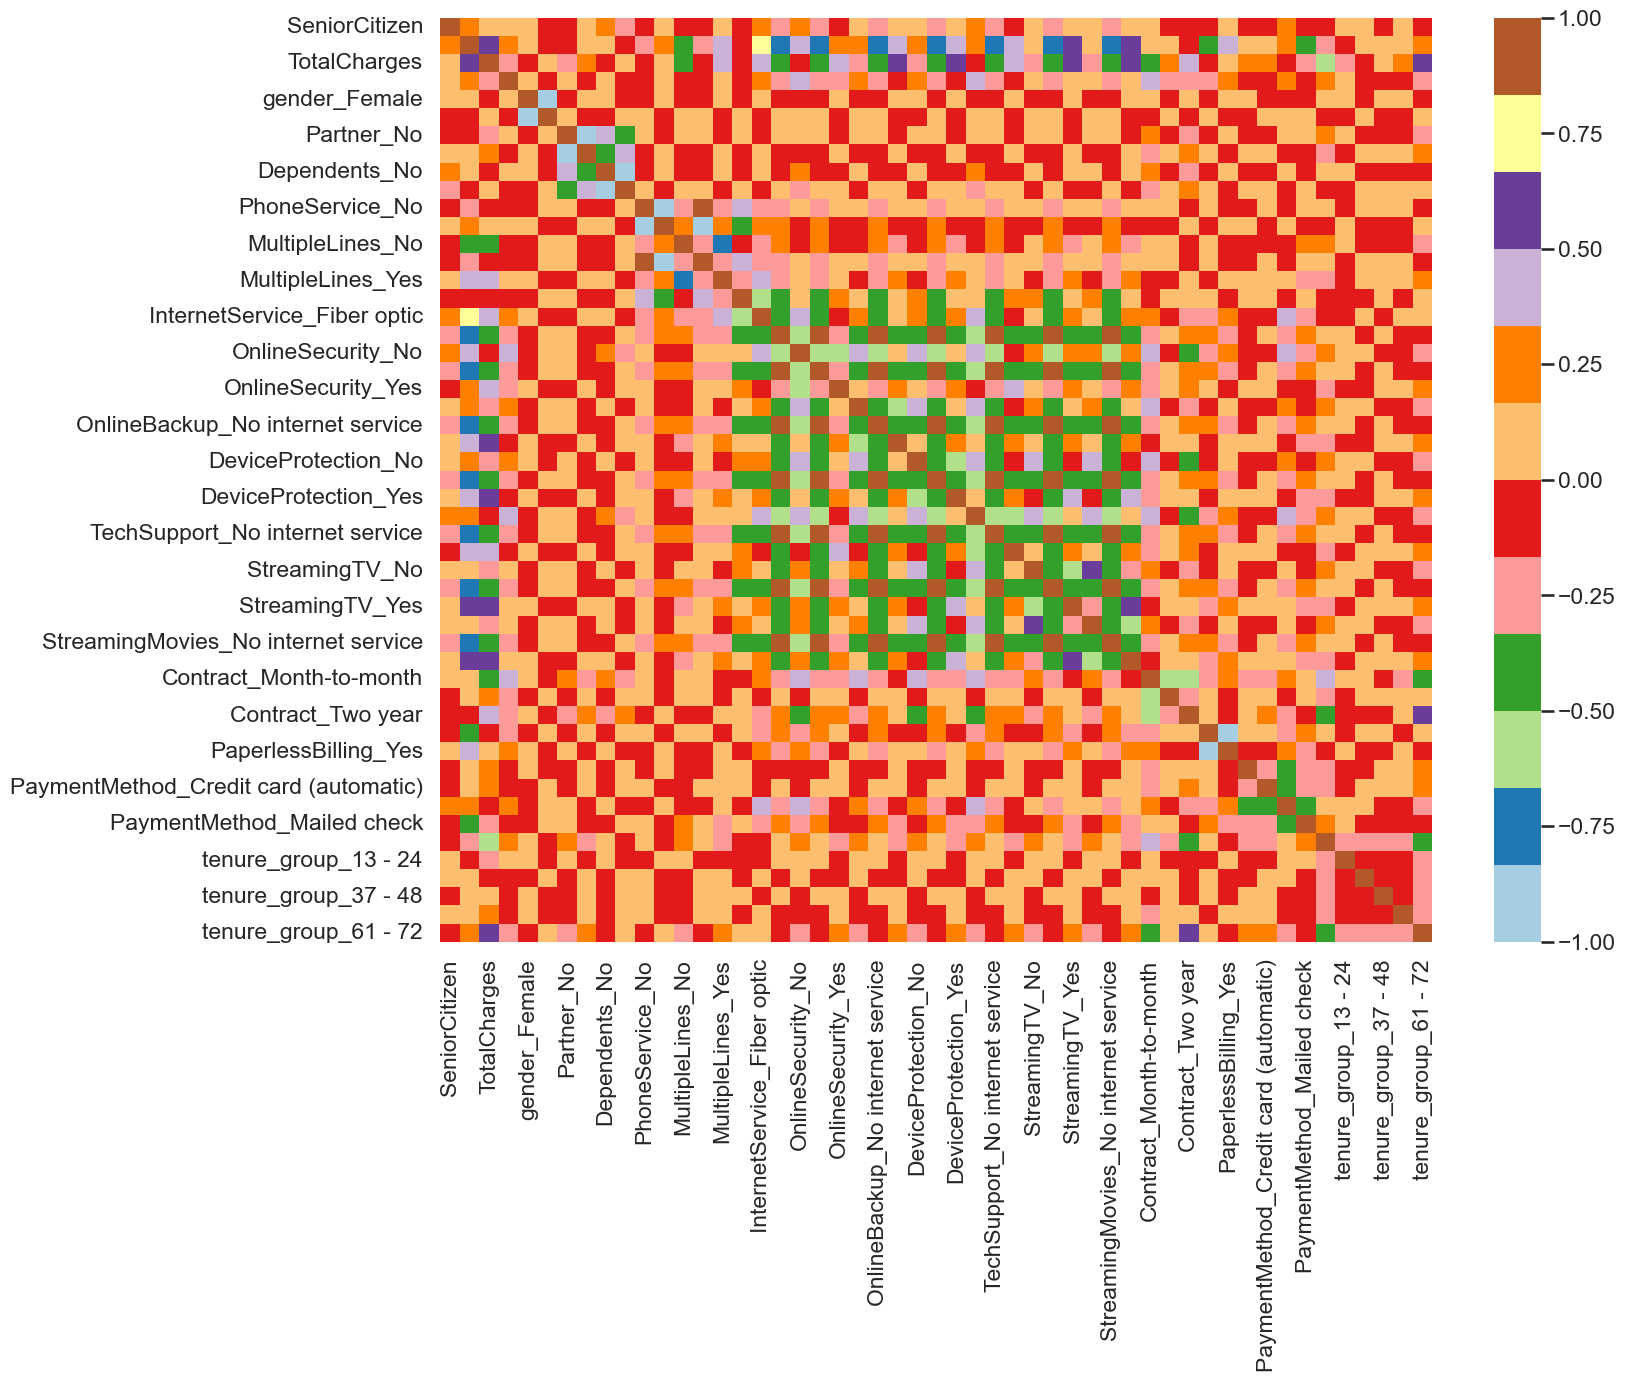

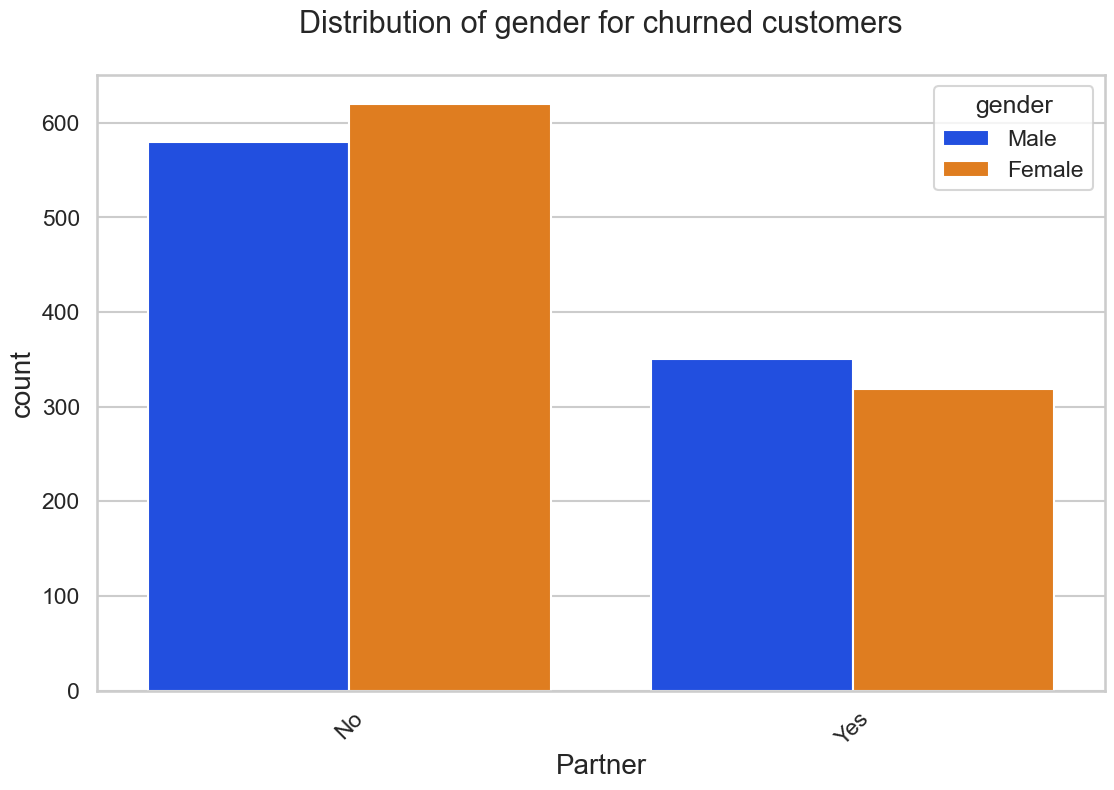

In [118]:
uniplot(new_df1_target1,col='Partner',title='Distribution of gender for churned customers',hue='gender')

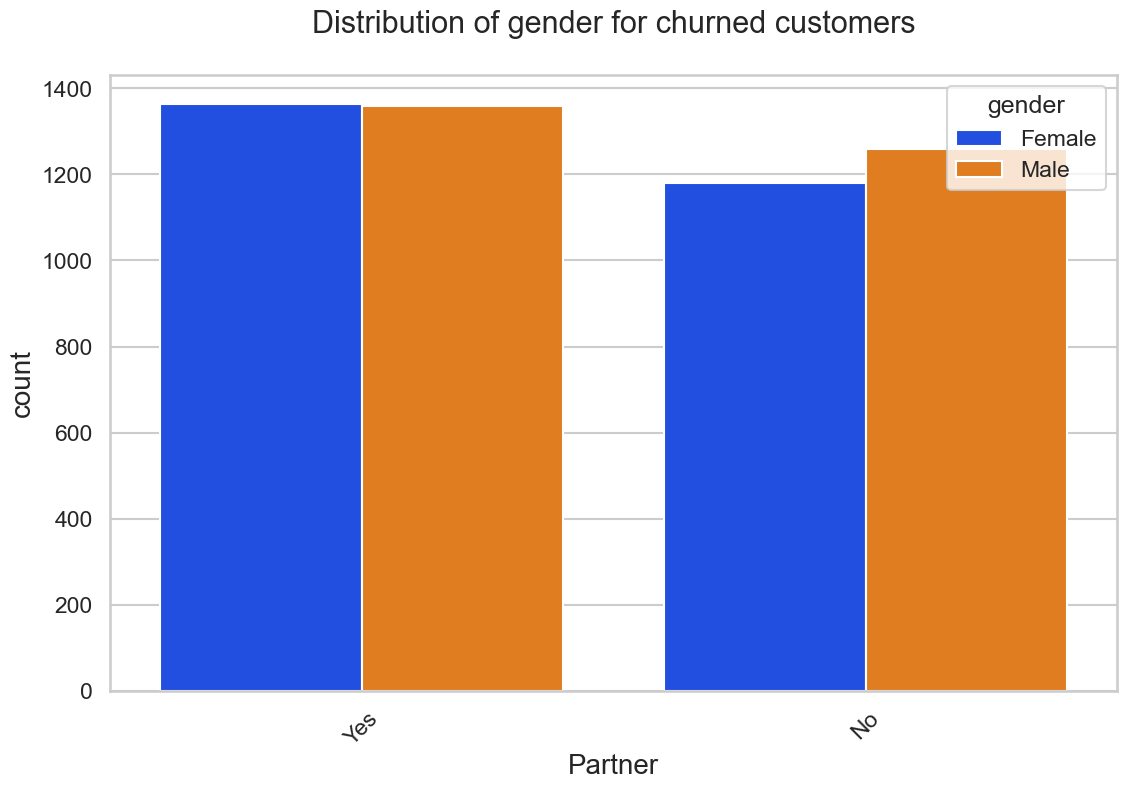

In [119]:
uniplot(new_df1_target0,col='Partner',title='Distribution of gender for churned customers',hue='gender')

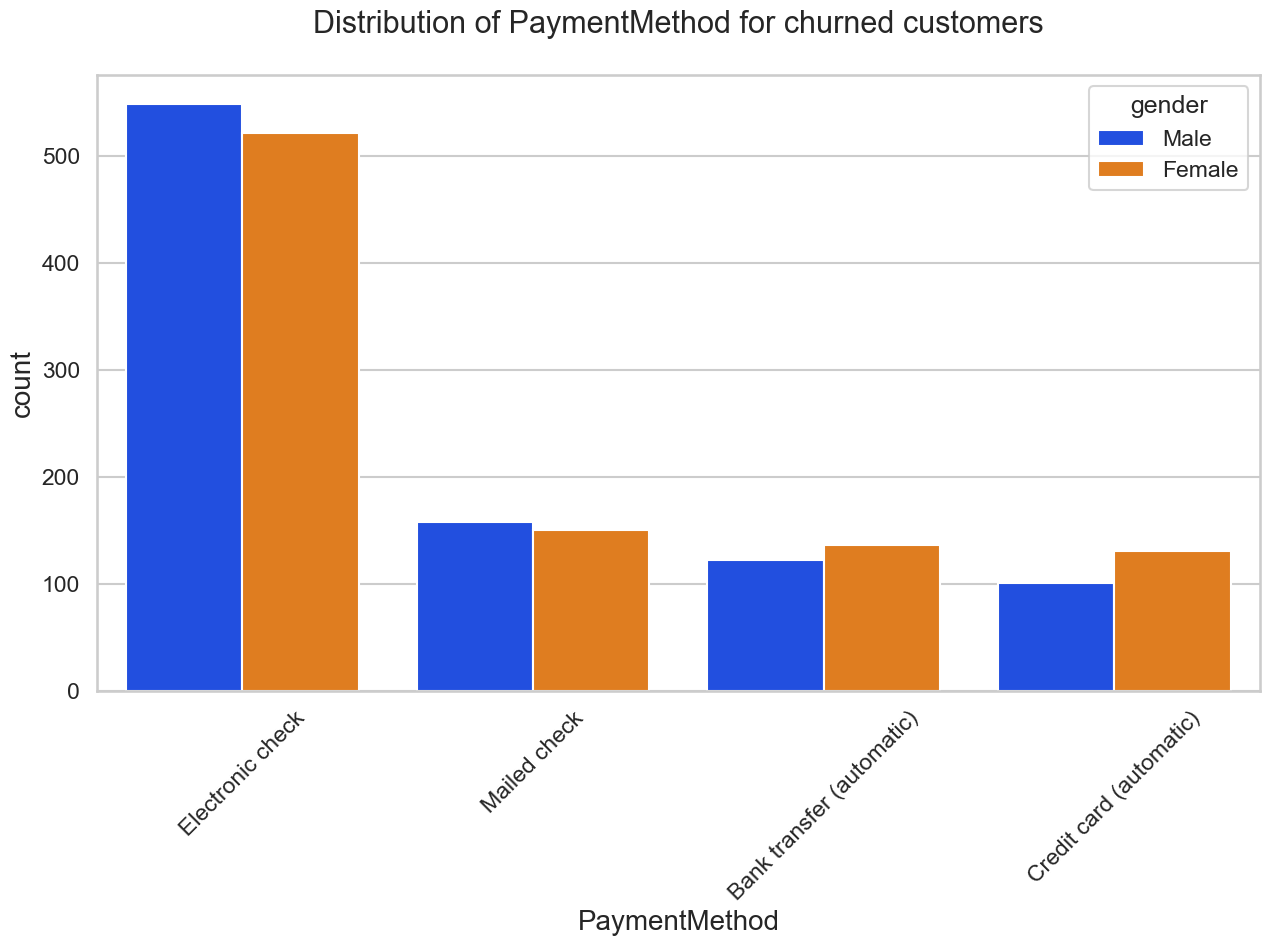

In [120]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for churned customers',hue='gender')

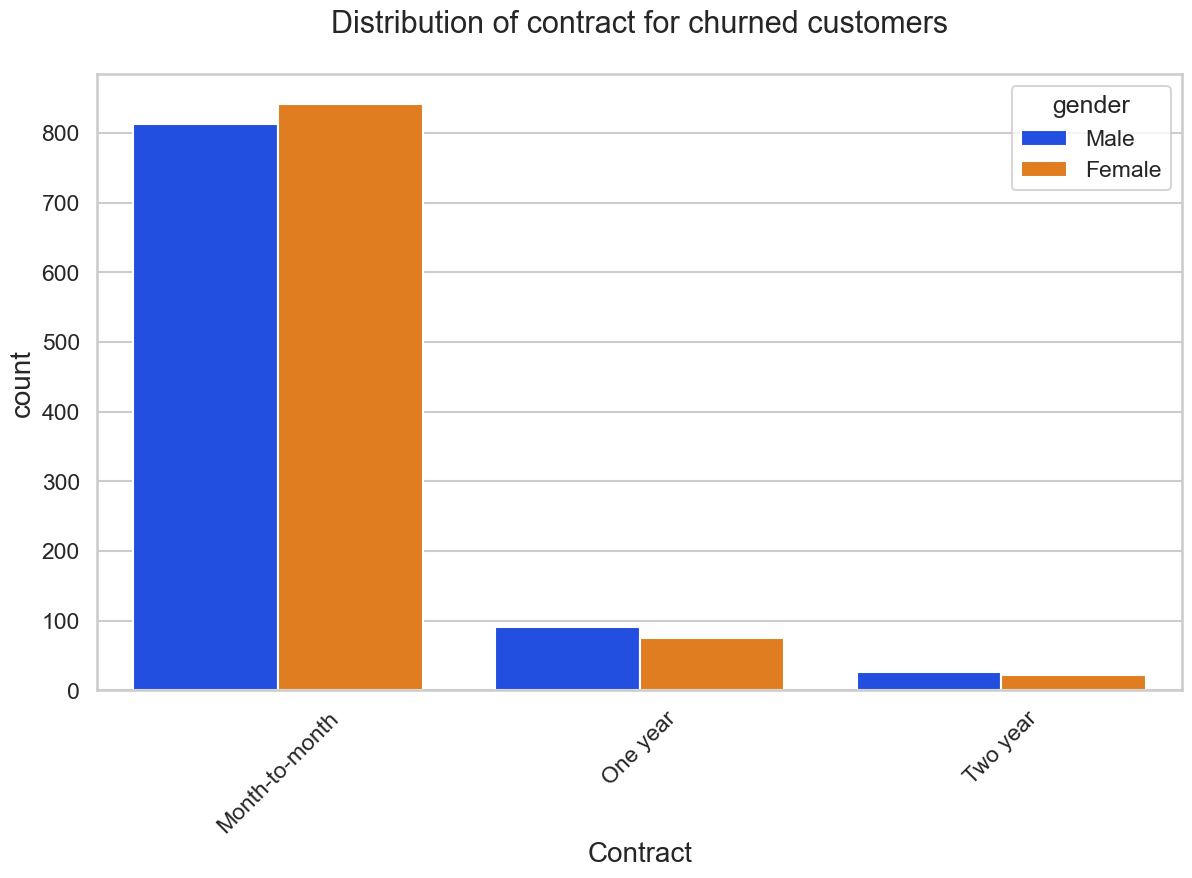

In [121]:
uniplot(new_df1_target1,col='Contract',title='Distribution of contract for churned customers',hue='gender')

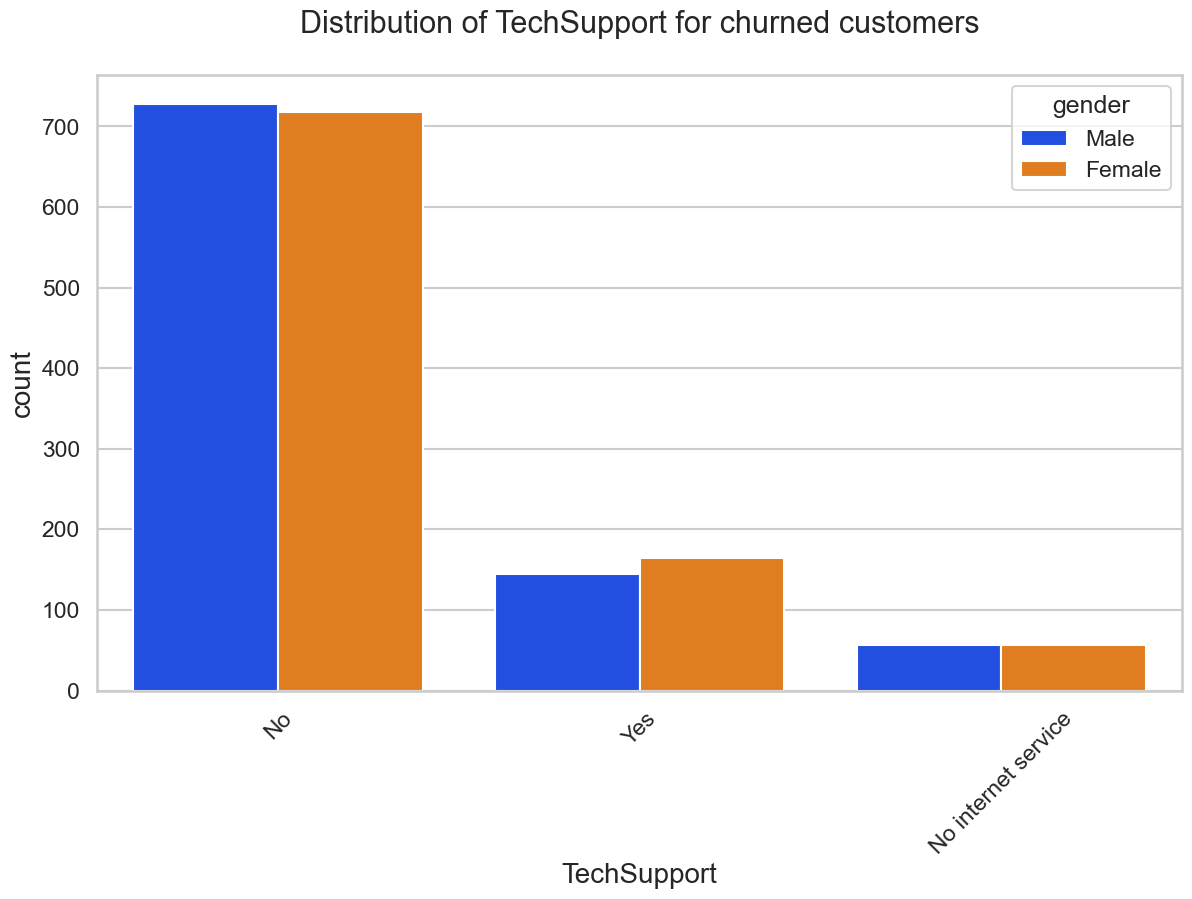

In [122]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for churned customers',hue='gender')

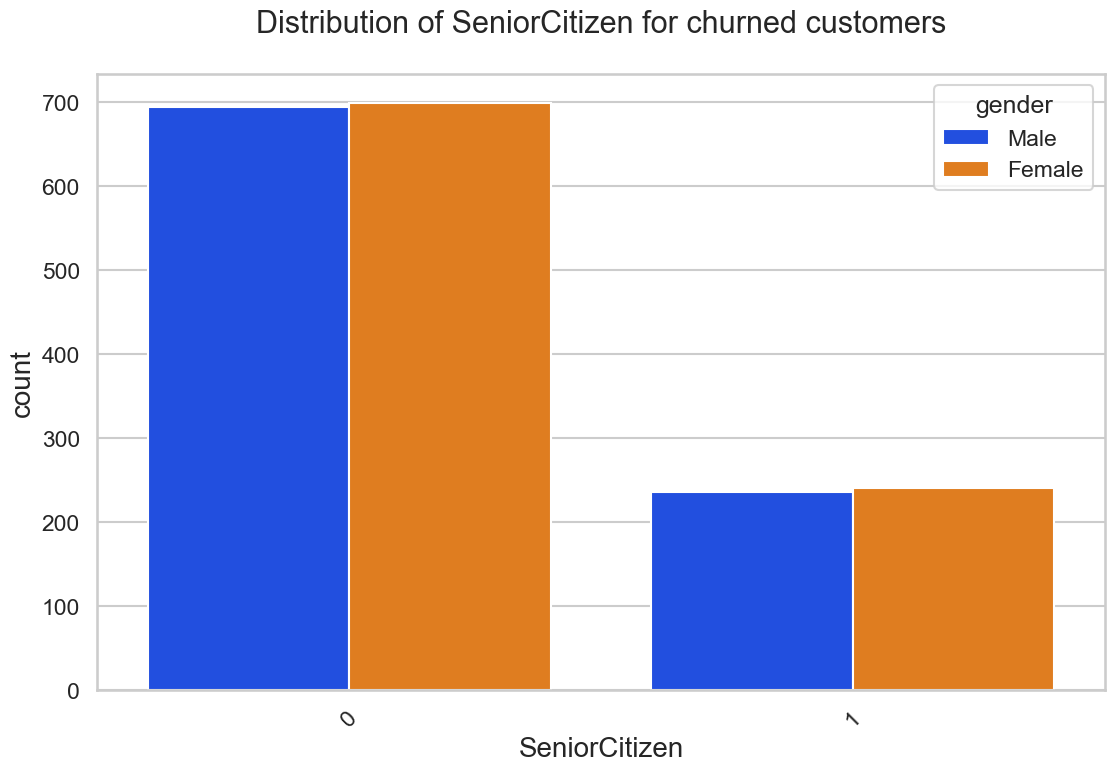

In [123]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for churned customers',hue='gender')

In [124]:
telco_data_dummies.to_csv('tel_churn.csv')

In [125]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Loading our preprocessed data
df = pd.read_csv('tel_churn.csv')
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


In [126]:
# let's remove the index column that was created while saving to a csv file since we already have an index column in the data before saving to csv
df = df.drop('Unnamed: 0', axis=1)

In [172]:
# let's separate our features from the target variable in preparation for model training 
x = df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,False,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
7028,0,103.20,7362.90,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
7029,0,29.60,346.45,True,False,False,True,False,True,True,...,False,False,True,False,True,False,False,False,False,False
7030,1,74.40,306.60,False,True,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False


In [128]:
# let's extract our target variable which is the churn column
y = df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [129]:
# split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [130]:
## let's initialize a Decision Tree Classifier model

model = DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [131]:
# let's train our model
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [132]:
# let's use our model to make prediction on our test data
y_pred = model.predict(x_test)

In [133]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [134]:
# let's evaluate the performance of our trained DecisionTreeClassifier model on the testing data
model.score(x_test,y_test)

0.7839374555792467

In [135]:
print(classification_report(y_test,y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1038
           1       0.62      0.47      0.53       369

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
# Since the data appears to be imbalanced as one class is significantly more prevalent than the other,
# we'll need a resampling technique to resample the data


In [137]:
# We are using the SMOTEEN algorithm for the resampling 
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
x_resample, y_resample = sm.fit_resample(x, y)

In [173]:
# let's split the resampled data into training and test sets
xr_train,xr_test,yr_train,yr_test= train_test_split(x_resample,y_resample,test_size=0.2)

In [174]:
# We train a DecisionTreeClassifier with the same parameters as before using the resampled data to improve class imbalance and improve predictive performance 
model_smote = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [175]:
model_smote.fit(xr_train,yr_train)
yr_predict = model_smote.predict(xr_test)
model_score_r = model_smote.score(xr_test,yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test,yr_test))

0.9187339606501284
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00       591

    accuracy                           1.00      1169
   macro avg       1.00      1.00      1.00      1169
weighted avg       1.00      1.00      1.00      1169



In [176]:
print(metrics.confusion_matrix(yr_test,yr_predict))

[[507  71]
 [ 24 567]]


In [177]:
## let's explore training a Random Forest Classifier on our data 
from sklearn.ensemble import RandomForestClassifier

In [178]:
model_rf = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [179]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [180]:
y_pred = model_rf.predict(x_test)

In [181]:
model_rf.score(x_test,y_test)

0.7967306325515281

In [182]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1038
           1       0.67      0.44      0.53       369

    accuracy                           0.80      1407
   macro avg       0.75      0.68      0.70      1407
weighted avg       0.78      0.80      0.78      1407



In [183]:
# To address class imbalance we'll use the SMOTEENN algorithm which combines the synthetic minority over sampling technique SMOTE with edited nearest neighbor ENN to resample our data
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [184]:
# let's split our resampled data into training and testing sets
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [185]:
# let's initialize random forest classifier with the same parameters using the resampled data
model_rf_smote=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=100, max_depth=6, min_samples_leaf=8)


In [186]:
# let's train our model on the resampled data
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [187]:
# let's use our trained model to predict on our resampled testing data
yr_predict1 = model_rf_smote.predict(xr_test1)


In [188]:
# we calculate the accuracy of the model
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [189]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9315300084530854
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       544
           1       0.92      0.95      0.94       639

    accuracy                           0.93      1183
   macro avg       0.93      0.93      0.93      1183
weighted avg       0.93      0.93      0.93      1183



In [190]:
# let's generate a confusion matrix which returns the number of true positives,false positives  true negatives and false negatives
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[494  50]
 [ 31 608]]


In [191]:
# To further enhance our model training process let's apply principal components analysis PCA for dimensionality reduction 
from sklearn.decomposition import PCA

pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.fit_transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [192]:
# let's initialize a random forest classifier model to train on the pca transformed data
model = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [194]:
model.fit(xr_train_pca,yr_train1)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [195]:
# let's use our pca transformed model to make prediction on our testing data
yr_predict_pca = model.predict(xr_test_pca)

In [196]:
# lets evaluate the accuracy score of our pca transformed model
model_score_r_pca = model.score(xr_test_pca,yr_test1)

In [197]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1,yr_predict_pca))

0.68385460693153
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       544
           1       0.73      0.66      0.69       639

    accuracy                           0.68      1183
   macro avg       0.68      0.69      0.68      1183
weighted avg       0.69      0.68      0.68      1183



In [166]:
# Pickling the model(to help us serialize the model
import pickle

In [167]:
filename = 'model.sav'

In [198]:
# serialize and save our RandomForestClassifier model
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [199]:
# To load our saved model for future applications 
load_model = pickle.load(open(filename, 'rb'))

In [170]:
# let's evaluate it's performance on the resampled test data
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [171]:
model_score_r1

0.9356775300171527